In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

import acquire
import wrangle_zillow

In [2]:
df = acquire.get_zillow_data()

In [3]:
df.fips.value_counts()

6037.0    50551
6059.0    20593
6111.0     6237
Name: fips, dtype: int64

In [4]:
df = wrangle_zillow.wrangle_zillow(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51480 entries, 0 to 52118
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         51480 non-null  float64
 1   heatingorsystemtypeid         51480 non-null  float64
 2   parcelid                      51480 non-null  int64  
 3   id                            51480 non-null  int64  
 4   logerror                      51480 non-null  float64
 5   transactiondate               51480 non-null  object 
 6   bathroomcnt                   51480 non-null  float64
 7   bedroomcnt                    51480 non-null  float64
 8   buildingqualitytypeid         51480 non-null  float64
 9   calculatedfinishedsquarefeet  51480 non-null  float64
 10  finishedsquarefeet12          51480 non-null  float64
 11  fips                          51480 non-null  object 
 12  fullbathcnt                   51480 non-null  float64
 13  l

## Now let's split the data before checking it out

In [8]:
train, test = train_test_split(df, train_size=0.8, random_state=13)
train, val = train_test_split(df, train_size=0.8, random_state=13)
train

,propertylandusetypeid,heatingorsystemtypeid,parcelid,id,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,heatingorsystemdesc,propertylandusedesc,haversine_distance,regionid_city
14274,261.0,2.0,11636755,35220,0.013949,2017-05-11,6.0,5.0,11.0,5578.0,...,145986.0,448348.0,2016.0,302362.0,5433.30,6.037701e+13,Central,Single Family Residential,84.854778,10389.0
9855,261.0,7.0,11279350,38705,0.046860,2017-05-23,1.0,3.0,4.0,997.0,...,40887.0,54513.0,2016.0,13626.0,1422.99,6.037901e+13,Floor/Wall,Single Family Residential,26.240258,5534.0
34200,261.0,13.0,13861663,44128,0.011371,2017-06-07,2.5,3.0,6.0,2028.0,...,314794.0,421907.0,2016.0,107113.0,4936.78,6.059099e+13,None,Single Family Residential,116.793174,25218.0
29136,261.0,7.0,12802810,6626,-0.081219,2017-01-31,2.0,3.0,4.0,1801.0,...,34292.0,55582.0,2016.0,21290.0,1123.58,6.037501e+13,Floor/Wall,Single Family Residential,84.304367,396556.0
28181,261.0,7.0,12740279,65935,-0.024305,2017-08-11,2.0,4.0,4.0,1312.0,...,40275.0,63854.0,2016.0,23579.0,1171.77,6.037504e+13,Floor/Wall,Single Family Residential,91.440873,5465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,261.0,7.0,12300016,41050,-0.009307,2017-05-30,2.0,3.0,6.0,1221.0,...,77031.0,233427.0,2016.0,156396.0,3111.99,6.037536e+13,Floor/Wall,Single Family Residential,91.394373,47762.0
34008,261.0,13.0,13853265,54080,-0.037280,2017-07-05,2.0,3.0,6.0,1175.0,...,74054.0,315079.0,2016.0,241025.0,3687.24,6.059001e+13,None,Single Family Residential,89.984998,18874.0
33191,261.0,2.0,13069970,41045,-0.025847,2017-05-30,3.0,5.0,7.0,2755.0,...,550655.0,986817.0,2016.0,436162.0,11691.67,6.037403e+13,Central,Single Family Residential,76.423859,34636.0
47882,261.0,13.0,17056822,26158,0.108958,2017-04-13,1.0,2.0,6.0,832.0,...,54000.0,455000.0,2016.0,401000.0,5736.66,6.111001e+13,None,Single Family Residential,128.036142,13091.0


## Next let's plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

In [14]:
# Let's chart out a subset of columns for now, so the charts run in a decent amount of time
train_plot = train[['logerror',  'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12',  'fullbathcnt', 
       'lotsizesquarefeet', 'roomcnt','yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount',
        'regionid_city']]

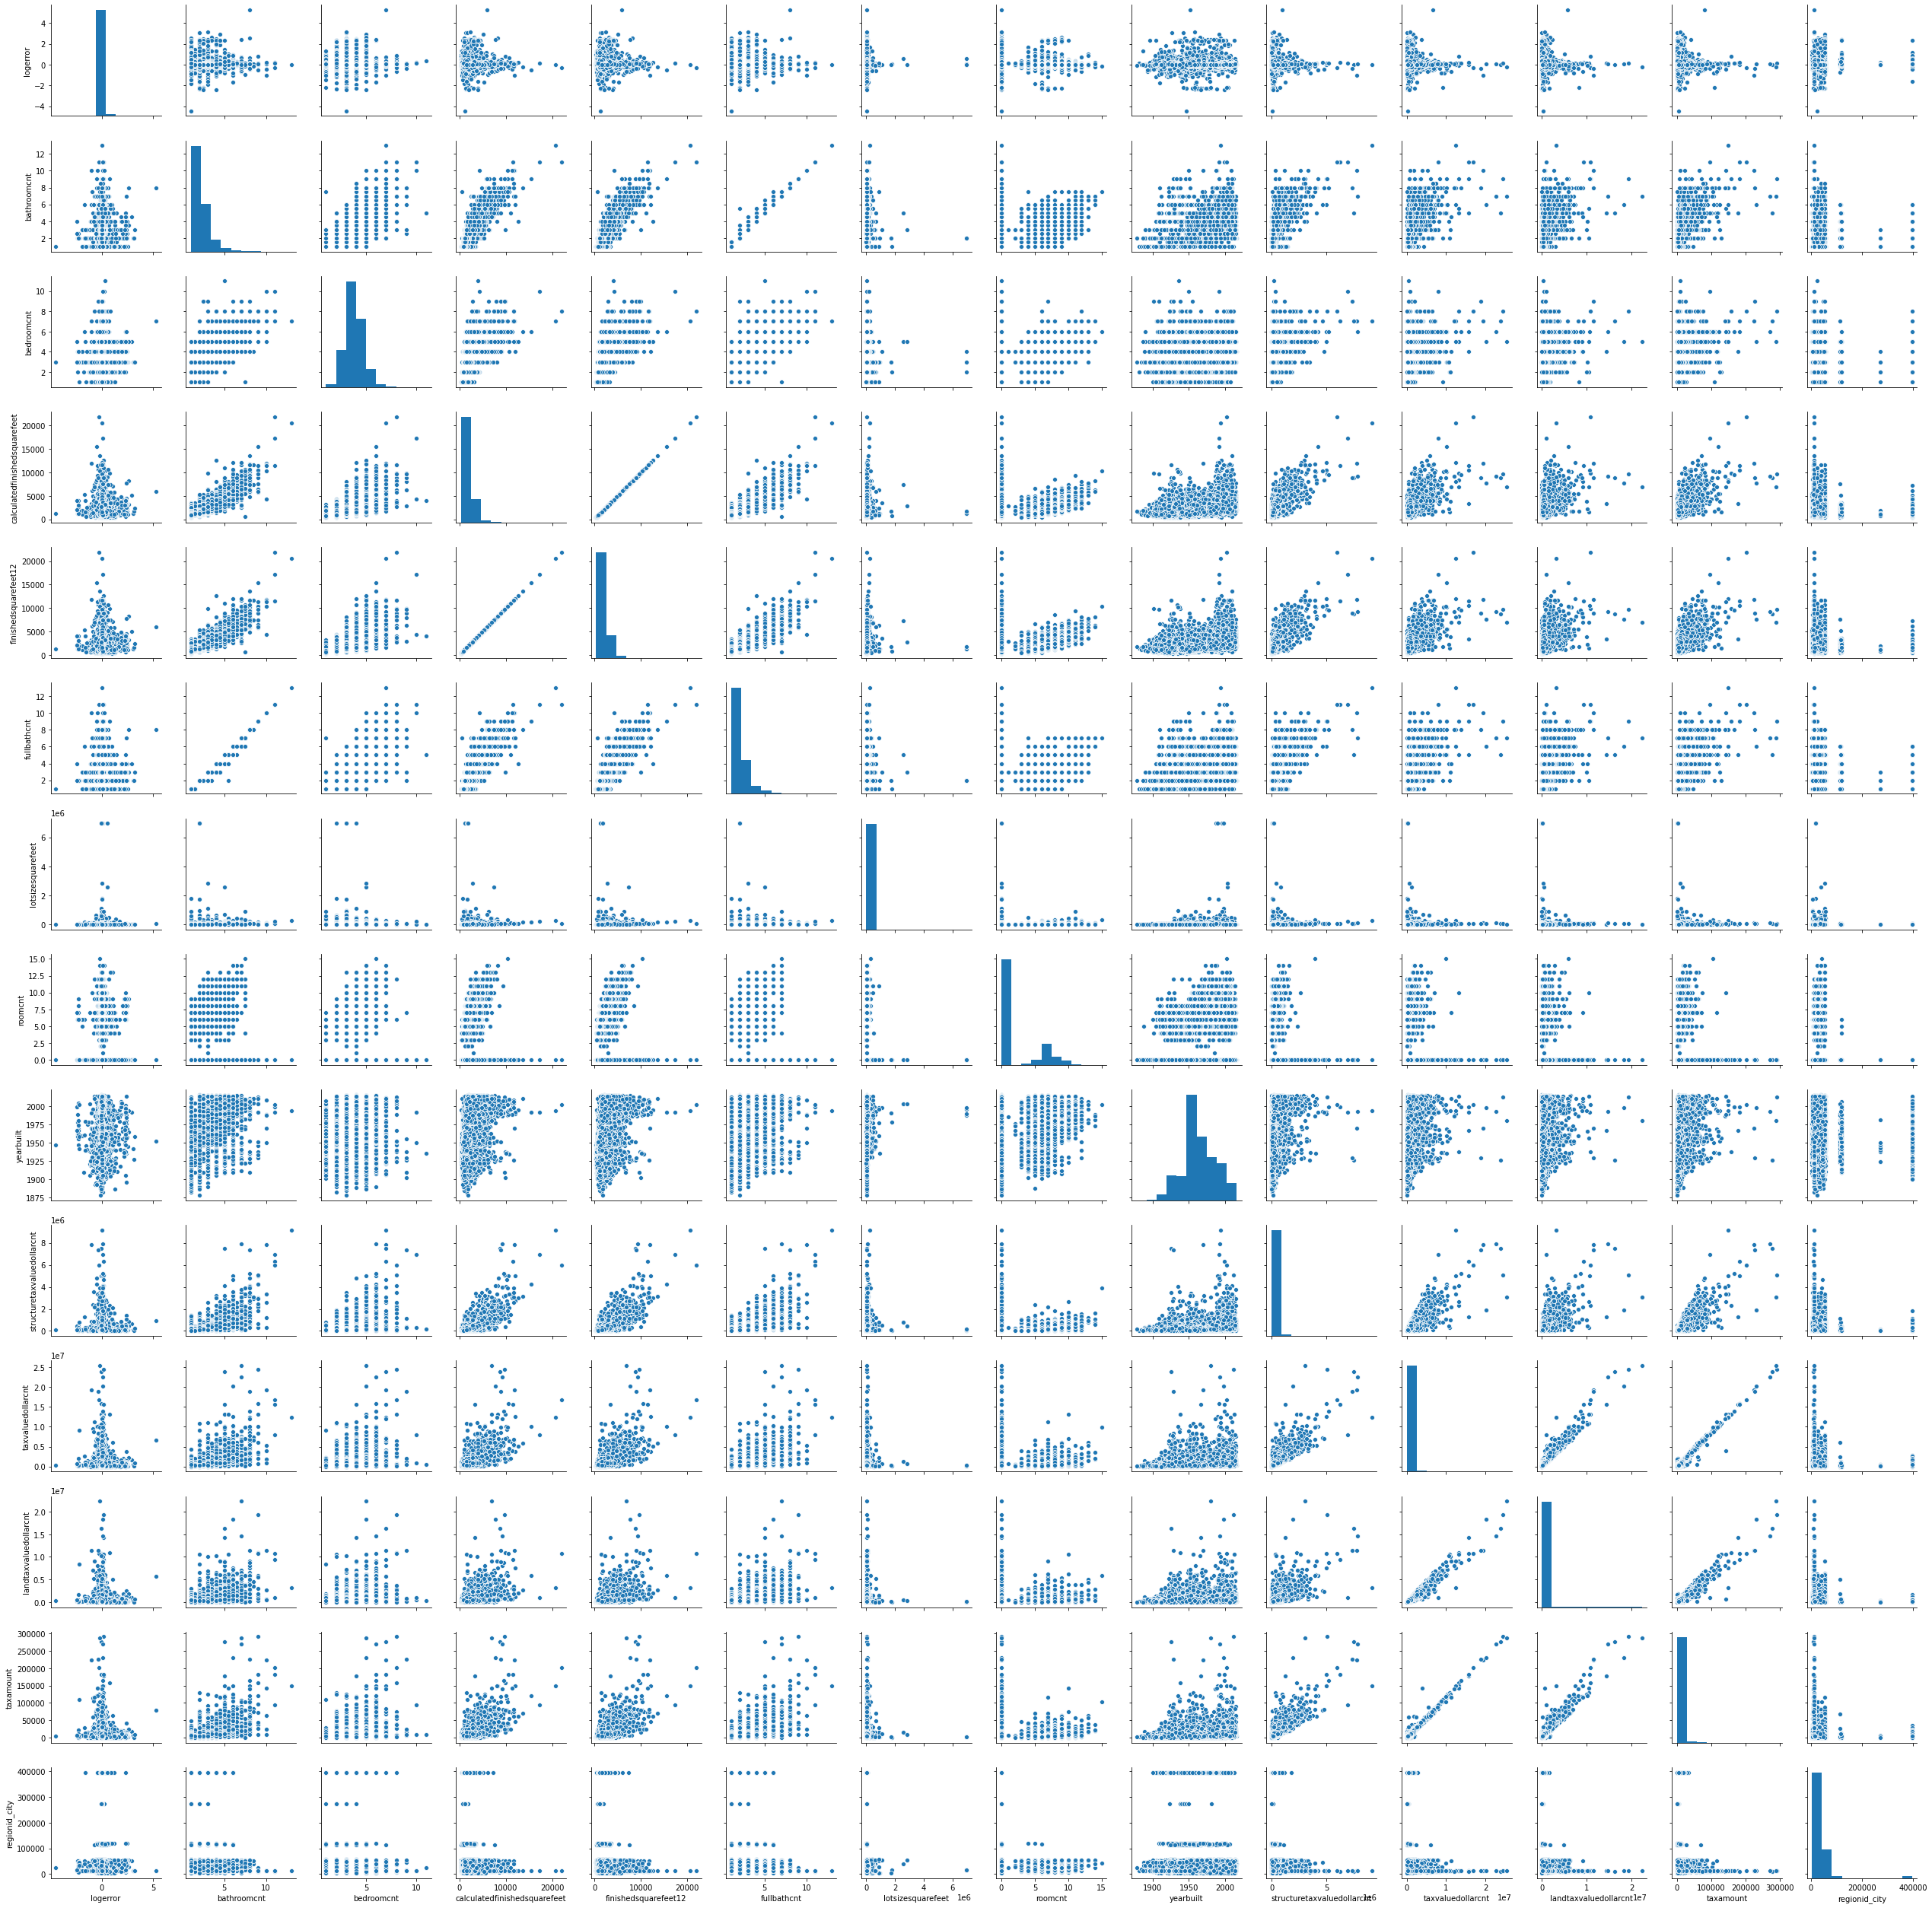

In [15]:
sns.pairplot(train_plot)

## Plot a correlation matrix heatmap.

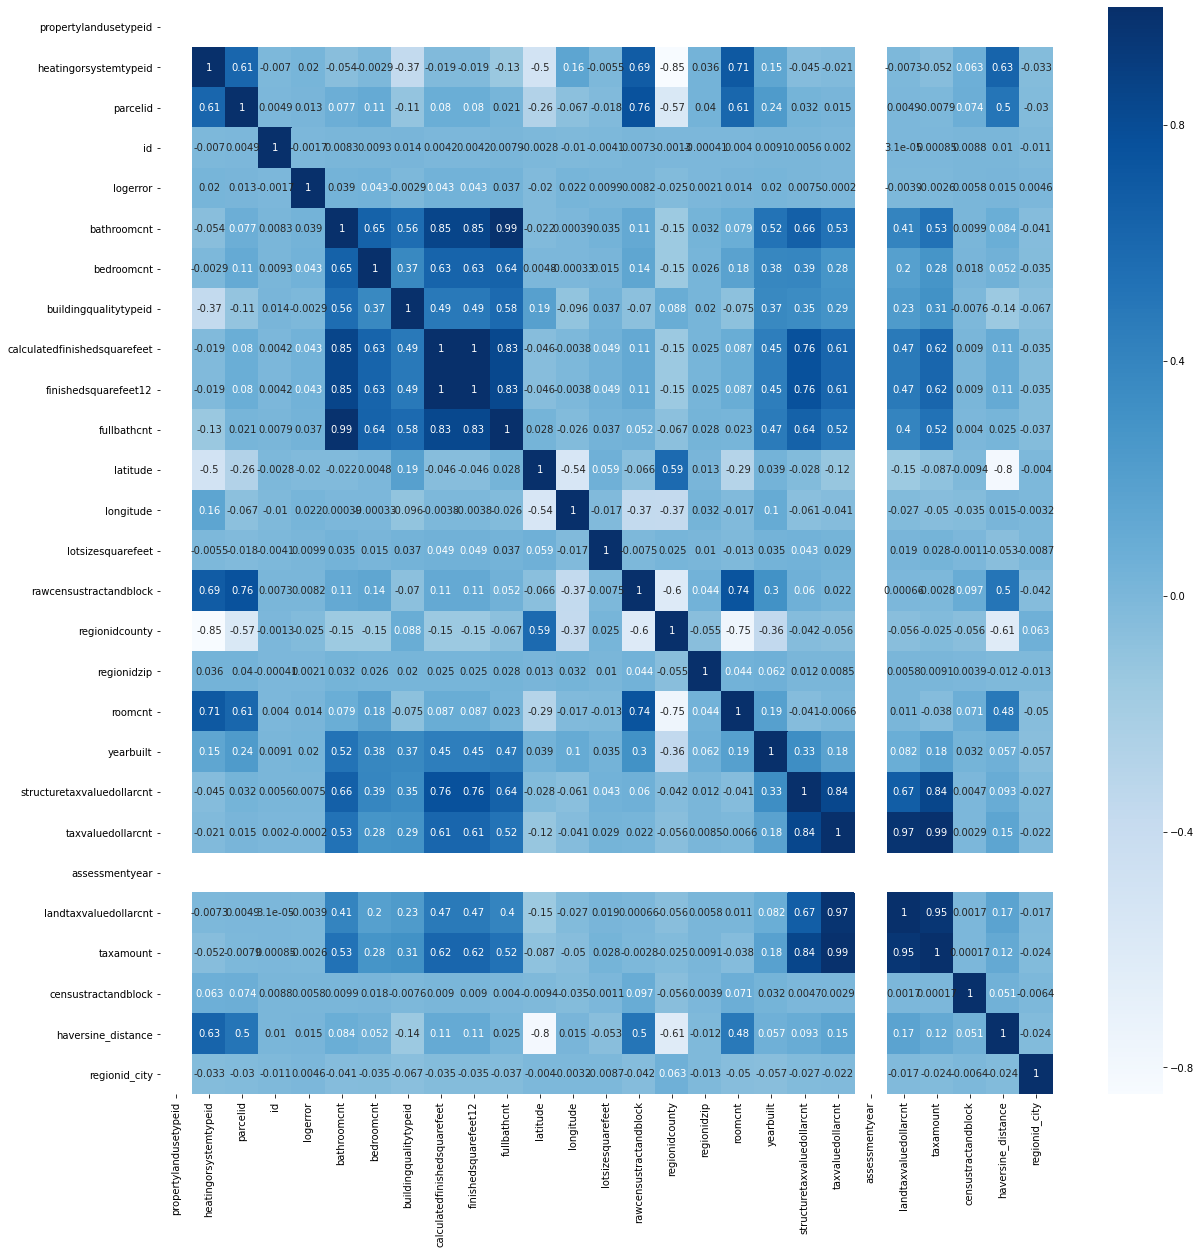

In [11]:
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

## Plot latitude agains longitude.

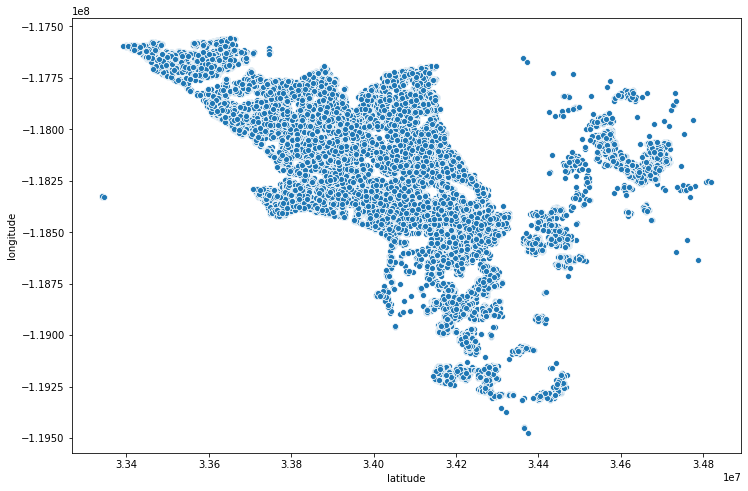

In [19]:
plt.figure(figsize = (12,8))
sns.scatterplot(x=train.latitude, y=train.longitude, data=train)

## Create a useable plot with 4 dimensions, e.g. x, y, color, size.

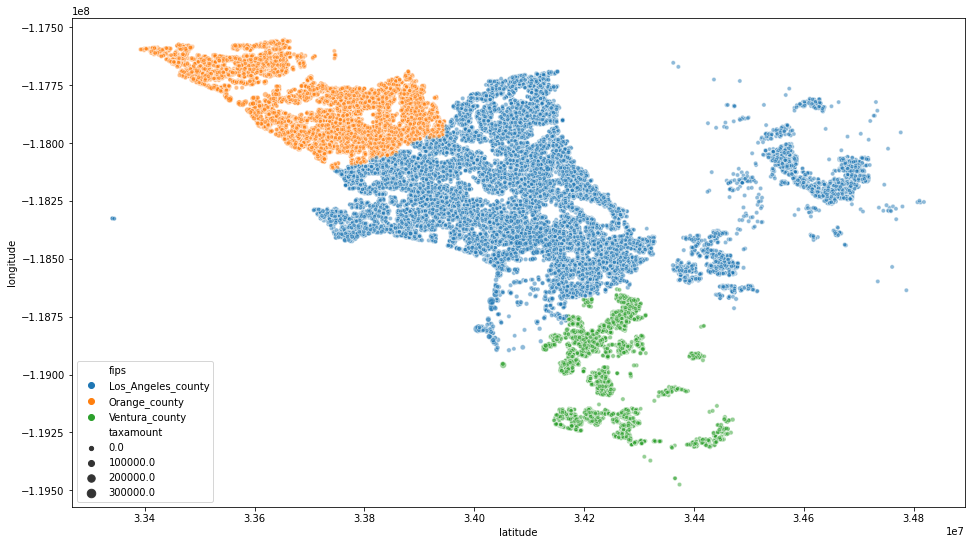

In [22]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = 'latitude', y = 'longitude', data = train, size ='taxamount', hue='fips', alpha=0.5)
plt.show()

## Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.


In [23]:
overall_logerror = train.logerror.mean()
overall_logerror

0.0179541895384129

In [27]:
train.regionidzip = train.regionidzip.astype(int)

In [28]:
pd.options.display.float_format = '{:20,.5f}'.format
zip_means = pd.DataFrame(train.groupby('regionidzip').logerror.mean()).reset_index()

In [29]:
zip_means.head()

,regionidzip,logerror
0,95982,-0.01405
1,95983,0.00457
2,95984,-0.07133
3,95985,-0.03970
4,95986,-0.02007


> $H_0$: There is no significant difference in overall mean logerror and zipcode logerror

> $H_a$: There is no significant difference in overall mean logerror and zipcode logerror


In [30]:
zip_list = []
for i in range(0, len(zip_means.regionidzip)):
    if stats.ttest_1samp(df[df.regionidzip == zip_means.regionidzip[i]].logerror, overall_logerror)[-1]<0.05:
        zip_list.append(df.regionidzip[i])

In [31]:
# List of zip codes where logerror mean is significantly higher or lower than mean logerror
zip_list

[96339.0,
 96339.0,
 nan,
 96339.0,
 nan,
 96339.0,
 96346.0,
 96346.0,
 nan,
 96339.0,
 nan,
 96339.0,
 96339.0,
 96339.0,
 96339.0,
 96339.0,
 96339.0,
 96339.0,
 96339.0,
 96339.0,
 96339.0,
 96339.0,
 96339.0,
 nan,
 96342.0,
 96342.0,
 96342.0,
 96342.0,
 nan,
 nan,
 96342.0,
 nan,
 nan,
 96338.0,
 96338.0,
 96342.0,
 96342.0,
 96338.0,
 nan,
 96342.0,
 96342.0,
 96342.0,
 nan,
 nan,
 nan,
 96342.0,
 96342.0]

#### Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?


In [34]:
stats.ttest_ind(train[train.fips=='Los_Angeles_county'].logerror, train[train.fips=='Orange_county'].logerror)

Ttest_indResult(statistic=-5.366804550247291, pvalue=8.061557383117445e-08)

> p value is almost zero, this means that mean for LA county is different than Orange county

In [35]:
stats.ttest_ind(train[train.fips=='Los_Angeles_county'].logerror, train[train.fips=='Ventura_county'].logerror)

Ttest_indResult(statistic=-0.11800461356883479, pvalue=0.9060647881305605)

> p value is very high, this means that mean for LA county is not different than Ventura county


In [36]:
stats.ttest_ind(train[train.fips=='Orange_county'].logerror, train[train.fips=='Ventura_county'].logerror)

Ttest_indResult(statistic=2.852738063285273, pvalue=0.0043405815525386846)

> p value is <0.05, this means that mean for Ventura county is different than Orange county


#### Use one way ANOVA to test three different means

In [38]:
stats.f_oneway(train[train.fips=='Orange_county'].logerror, train[train.fips=='Orange_county'].logerror, train[train.fips=='Los_Angeles_county'].logerror)


F_onewayResult(statistic=21.286798994810727, pvalue=5.745056482962628e-10)